In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data=pd.read_excel('cluster_data.xls',header=1)
labels=data.iloc[1:,0]
data=data.drop([0],axis=0).reset_index().drop(['index'],axis=1) #删除行
data=data.drop(['Unnamed: 0'],axis=1).rename({'Unnamed: 1':'Country'},axis=1)
# plt.hist(data.iloc[:,4])

# # 标准化
# mms=MinMaxScaler()
# for i in range(2,5):
#     data.iloc[:,i]=mms.fit_transform(data.iloc[:,i].to_numpy().reshape(-1,1))
data.iloc[:,2].min()

47.8

In [32]:
data

,Country,人文发展指数,出生时预期寿命,预期受教育年限,平均受教育年限,教育指数,收入指数,健康指数,性别不平等指数
0,挪威,0.943,0.935393,0.948529,1.000000,0.985,0.883,0.964,0.075
1,澳大利亚,0.929,0.957865,1.000000,0.947368,0.981,0.837,0.976,0.136
2,荷兰,0.91,0.924157,0.911765,0.912281,0.931,0.845,0.958,0.052
3,美国,0.91,0.862360,0.852941,0.982456,0.939,0.869,0.923,0.299
4,新西兰,0.908,0.924157,1.000000,0.991228,1,0.783,0.957,0.195
...,...,...,...,...,...,...,...,...,...
141,乍得,0.328,0.050562,0.205882,0.026316,0.219,0.344,0.466,0.735
142,莫桑比克,0.322,0.067416,0.352941,0.000000,0.222,0.314,0.477,0.602
143,布隆迪,0.316,0.073034,0.448529,0.131579,0.353,0.186,0.48,0.478
144,尼日尔,0.295,0.193820,0.036765,0.017544,0.177,0.266,0.547,0.724


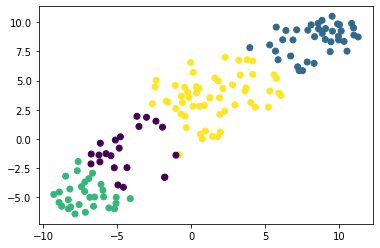

In [33]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 导入数据
X=data.iloc[:,1:].to_numpy()  

# 聚类
model=KMeans(n_clusters=4)  # 获取模型
y_pred=model.fit_predict(X)  # 预测结果

# 降维
tsne = TSNE(n_components=2)  # 降维度至二维
trans_X=tsne.fit_transform(X) # 拟合

# 作图
plt.scatter(trans_X[:,0],trans_X[:,1],c=y_pred)


k = 2, silhouette_score = 0.5398834869415241
k = 3, silhouette_score = 0.4333926446000797
k = 4, silhouette_score = 0.3667091282350039
k = 5, silhouette_score = 0.3641327132519512
best_k = 2,max_score = 0.5398834869415241


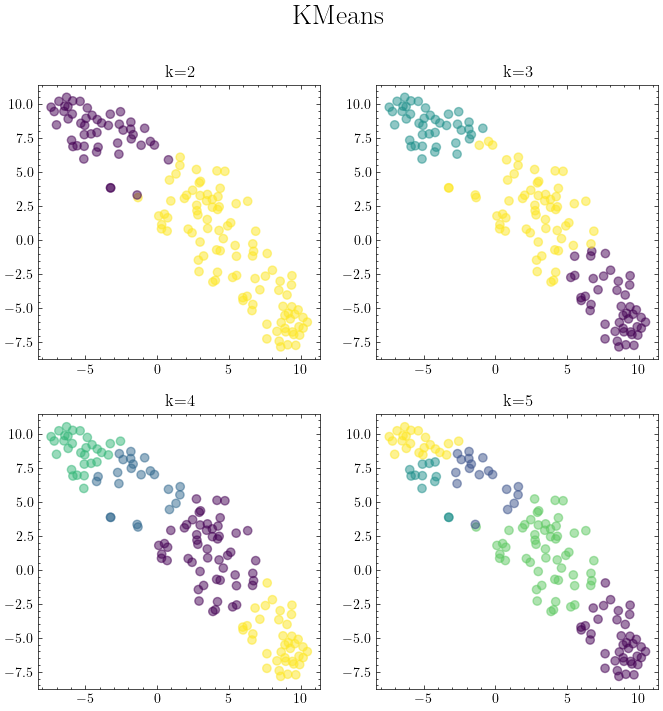

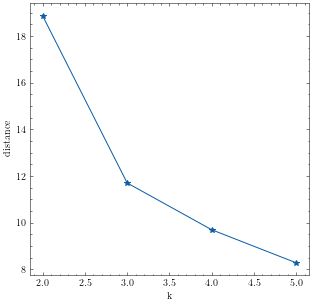

In [34]:
import matplotlib.pyplot as plt
import matplotlib.style as ms
import vapeplot
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
vapeplot.set_palette('vaporwave')

ms.use(['science'])

# 降维
tsne = TSNE(n_components=2)  # 降维度至二维
trans_X=tsne.fit_transform(X) # 拟合

# 评估聚类结果，找到最合适的聚类方法
max_score=-2 # 找到最大分数
best_k=1


fig,ax=plt.subplots(2,2,figsize=(8,8),dpi=100)  # 绘制聚类图
fig.suptitle('KMeans',fontsize=20)
fig.set_facecolor('white')
fig1,ax1=plt.subplots(figsize=(5,5)) # 绘制误差图
fig1.set_facecolor('white')
row=0 # 行数，用于画图
distances=[]

for i in range(2,6):

    # 聚类
    model=KMeans(n_clusters=i)  # 获取模型
    y_pred=model.fit_predict(X)  # 预测结果
    distances.append(model.inertia_)  # 存储距离结果

    # 作图
    if i%2==0:

        ax[row][i%2].scatter(trans_X[:,0],trans_X[:,1],c=y_pred,alpha=0.5)
        ax[row][i%2].set_title(f'k={i}')

    if i%2==1:
        vapeplot.set_palette('vaporwave')
        ax[row][i%2].set_title(f'k={i}')
        ax[row][i%2].scatter(trans_X[:,0],trans_X[:,1],c=y_pred,alpha=0.5)
        row+=1
    
    # 计算分数，找到最高分数
    temp_score=metrics.silhouette_score(X,y_pred)
    print(f'k = {i}, silhouette_score = {metrics.silhouette_score(X,y_pred)}')
    if temp_score>max_score:
        best_k=i
        max_score=temp_score
    
    

ax1.plot(list(range(2,6)),distances,'*-')
ax1.set_xlabel('k')
ax1.set_ylabel('distance')
print(f'best_k = {best_k},max_score = {max_score}')

Text(0, 0.5, 'X1')

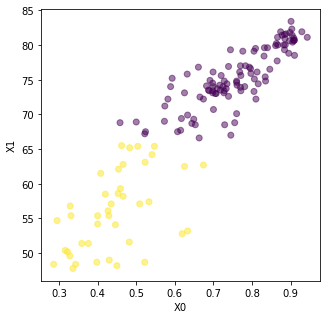

In [5]:
# alt + shift 选取多行
# k=2时的具体分析
model=KMeans(n_clusters=2)  # 获取模型
y_pred=model.fit_predict(X)  # 预测结果
vapeplot.set_palette('cool')
fig,ax=plt.subplots(figsize=(5,5))
fig.set_facecolor('white')

ax.scatter(X[:,0],X[:,1],c=y_pred,alpha=0.5)
ax.set_xlabel('X0')
ax.set_ylabel('X1')

k = 2, silhouette_score = 0.6233627585522731
k = 3, silhouette_score = 0.4913355322242416
k = 4, silhouette_score = 0.4758600655372336
k = 5, silhouette_score = 0.4344481026038781
best_k = 2,max_score = 0.6233627585522731


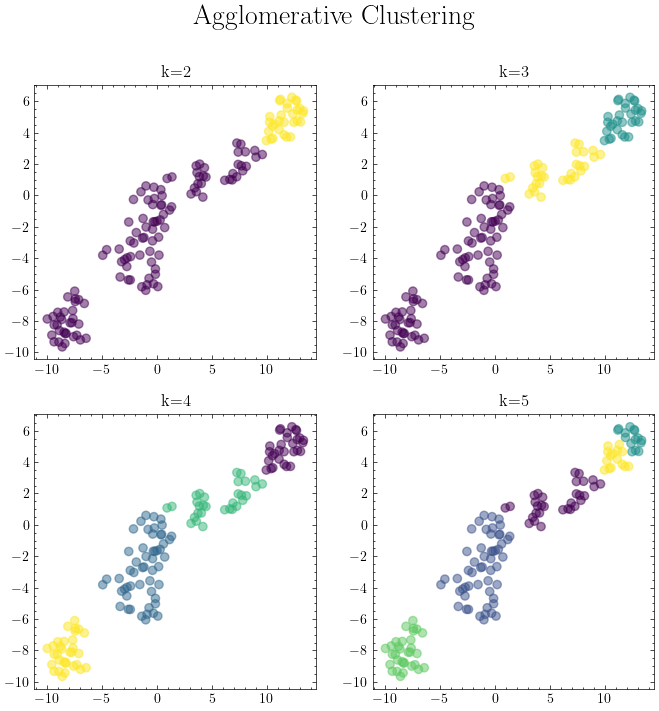

In [4]:
from sklearn.cluster import AgglomerativeClustering

def Agg_Cluster(X):
# 评估聚类结果，找到最合适的聚类方法

    max_score=-2 # 找到最大分数
    best_k=1

    fig,ax=plt.subplots(2,2,figsize=(8,8),dpi=100)  # 绘制聚类图
    fig.suptitle('Agglomerative Clustering',fontsize=20)
    fig.set_facecolor('white')
    row=0 # 行数，用于画图

    for i in range(2,6):
        # 聚类
        ac = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
        y_pred=ac.fit_predict(X)
        # distances.append(ac.)  # 存储距离结果

        # 作图
        if i%2==0:
            
            ax[row][i%2].scatter(trans_X[:,0],trans_X[:,1],c=y_pred,alpha=0.5)
            ax[row][i%2].set_title(f'k={i}')
        
        if i%2==1:
            ax[row][i%2].set_title(f'k={i}')
            ax[row][i%2].scatter(trans_X[:,0],trans_X[:,1],c=y_pred,alpha=0.5)
            row+=1
        
        # 计算分数，找到最高分数
        temp_score=metrics.silhouette_score(X,y_pred)
        print(f'k = {i}, silhouette_score = {metrics.silhouette_score(X,y_pred)}')

        if temp_score>max_score:
            best_k=i
            max_score=temp_score
        
    print(f'best_k = {best_k},max_score = {max_score}')


Agg_Cluster(X)

Text(0.5, 0, 'x轴')

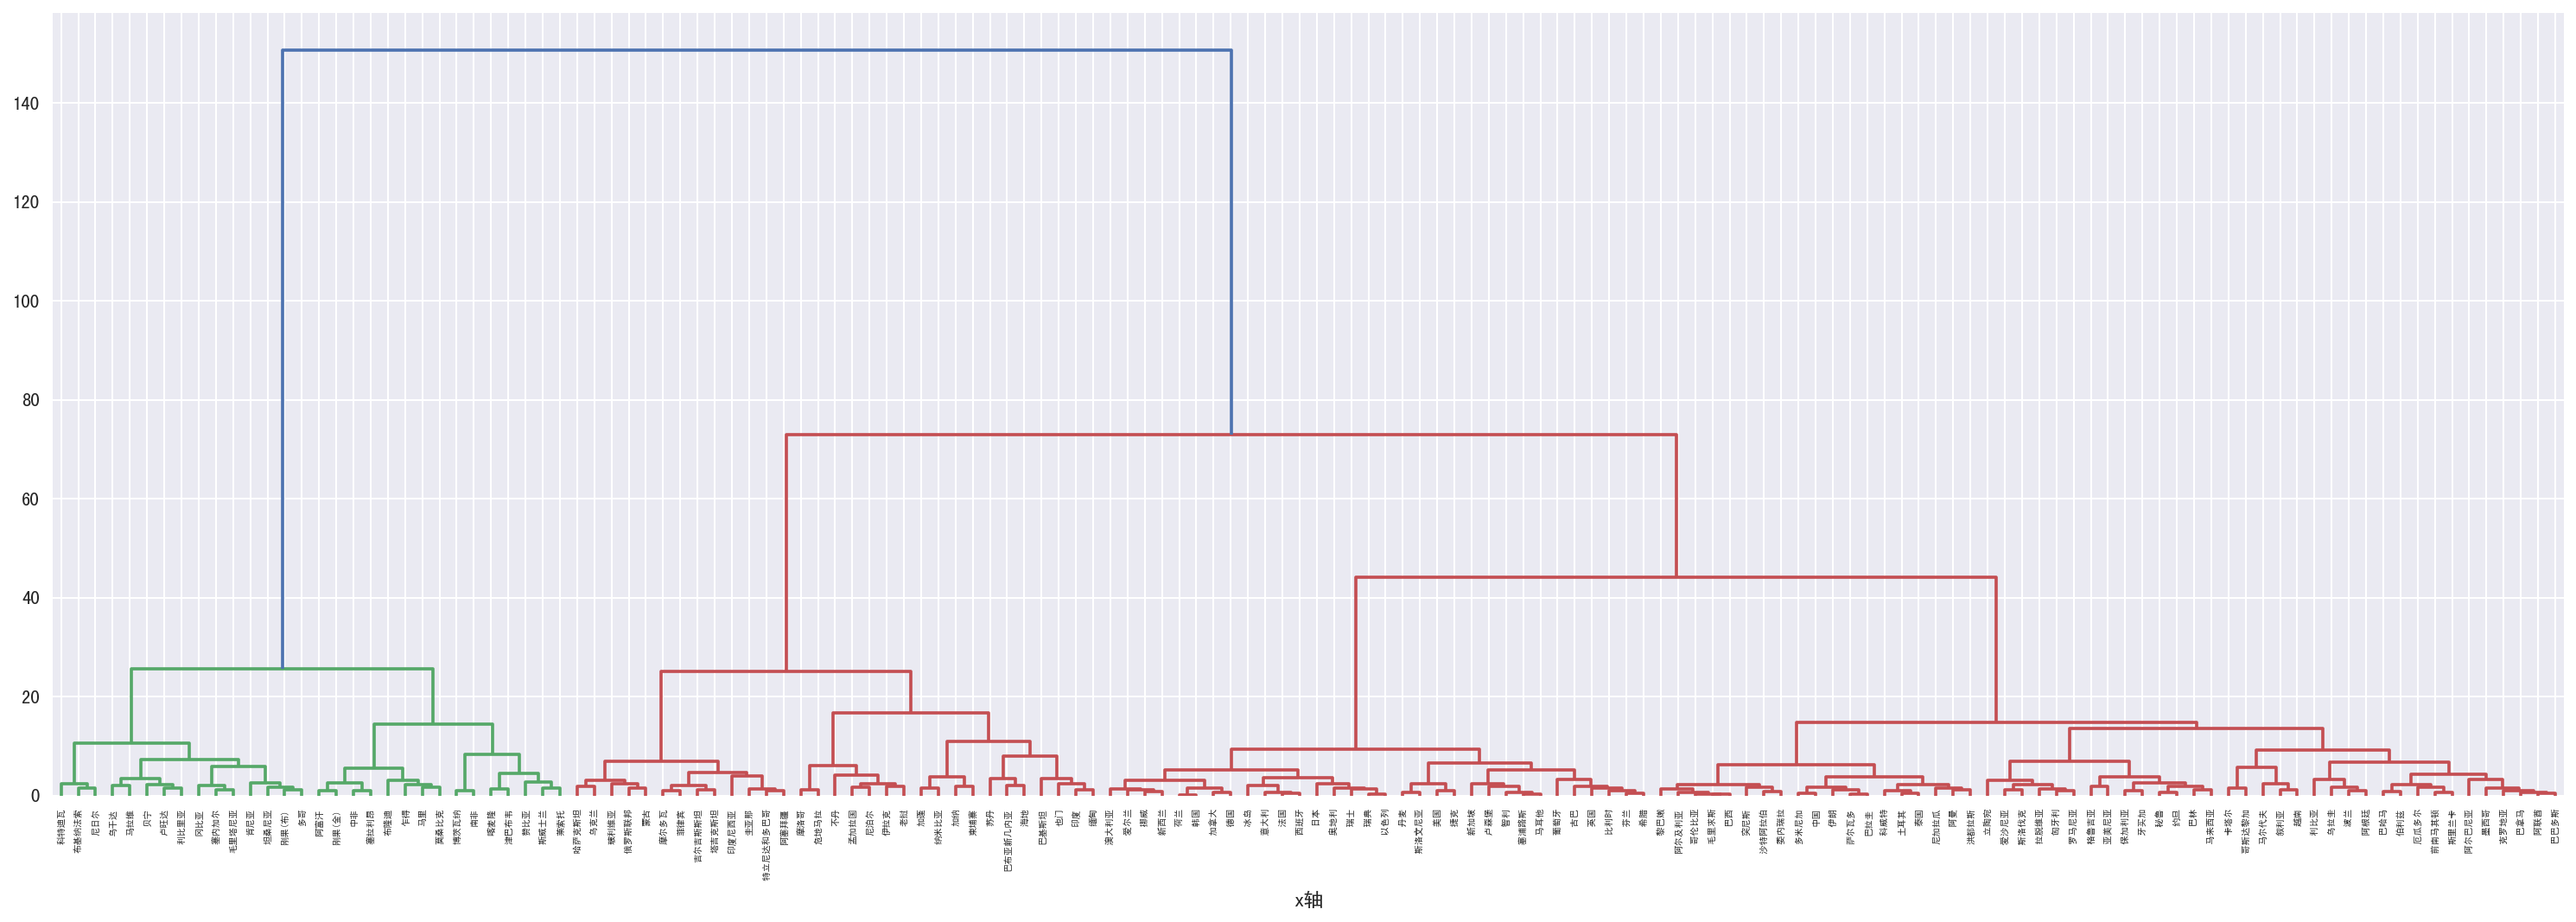

In [8]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import matplotlib.style as ms
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签

result=sch.linkage(X,method='ward')
fig=plt.figure(figsize=(25,8),dpi=150)
fig.set_facecolor('white')
# sch.dendrogram(result,labels=labels.to_list())
sch.dendrogram(result,labels=data.Country.to_list())
plt.xlabel('x轴')


Text(0.5, 0, '轴')

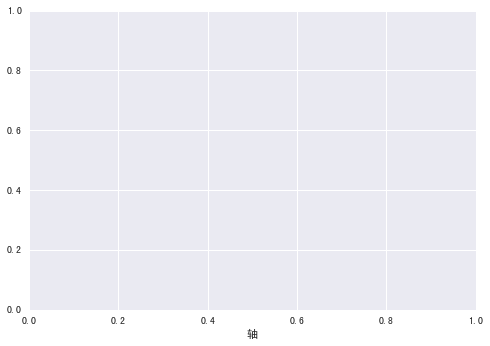

In [6]:
import matplotlib
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.xlabel("轴")

In [24]:
from matplotlib.font_manager import _rebuild
_rebuild()

In [25]:
font_list=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in font_list:
  print(i)

.Aqua Kana
.Keyboard
.New York
.New York
.SF Arabic
.SF Compact
.SF Compact
.SF Compact Rounded
.SF NS Mono
.SF NS Mono
.SF NS Rounded
Academy Engraved LET
Al Bayan
Al Nile
Al Tarikh
American Typewriter
Andale Mono
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Chancery
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Arial
Arial
Arial
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Narrow
Arial Narrow
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Arial Unicode MS
Athelas
Avenir
Avenir Next
Avenir Next Condensed
Ayuthaya
Baghdad
Bangla MN
Bangla Sangam MN
Baskerville
Beirut
Big Caslon
Bodoni 72
Bodoni 72 Oldstyle
Bodoni 72 Smallcaps
Bodoni Ornaments
Bradley Hand
Brush Script MT
Chalkboard
Chalkboard SE
Chalkduster
Charter
Cochin
Comic Sans MS
Comic Sans MS
Copperplate
Corsiva Hebrew
Courier
Courier New
Courier New
Courier New
Courier New
DIN Alternate
DIN Condensed
Damascus
DecoType Naskh
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
Dej